In [49]:
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sns

In [50]:
df = pd.read_csv('Salary_Data_Cleaned.csv')

In [51]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [52]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [53]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [54]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [55]:
df.job_simplified.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
machine learning     22
manager              22
director             14
Name: job_simplified, dtype: int64

In [56]:
df['seniority'] = df['Job Title'].apply(seniority)

In [57]:
df.seniority.value_counts()

na        520
senior    220
junior      2
Name: seniority, dtype: int64

In [58]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
IN     10
UT     10
MO      9
AZ      9
AL      8
GA      6
DE      6
MI      6
KY      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [59]:
df['description_length'] = df['Job Description'].apply(lambda x: len(x))
df['description_length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: description_length, Length: 742, dtype: int64

In [60]:
df['Number_of_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [61]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [62]:
df['Number_of_Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Number_of_Competitors, Length: 742, dtype: int64

In [63]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [64]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [65]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', '.'))

In [66]:
df['company_txt']

0                          Tecolote Research.
1      University of Maryland Medical System.
2                                    KnowBe4.
3                                       PNNL.
4                         Affinity Solutions.
                        ...                  
737                                      GSK.
738                               Eventbrite.
739           Software Engineering Institute.
740                             Numeric, LLC.
741             Riverside Research Institute.
Name: company_txt, Length: 742, dtype: object

In [67]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,description_length,Number_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


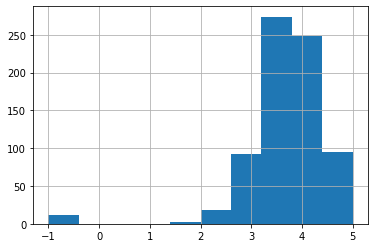

In [68]:
df.Rating.hist()

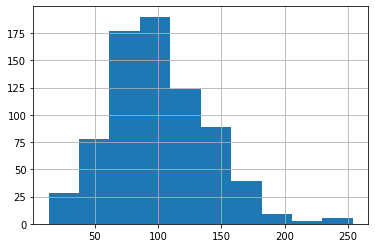

In [69]:
df.avg_salary.hist()

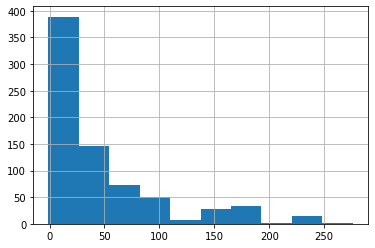

In [70]:
df.age.hist()

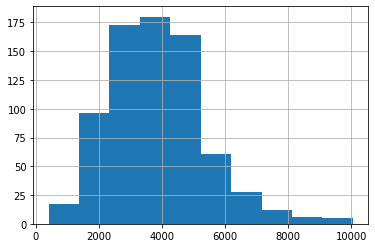

In [71]:
df.description_length.hist()

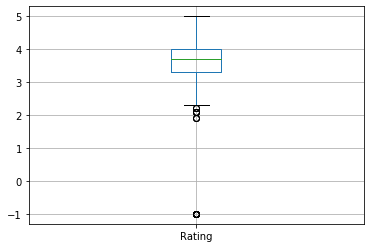

In [72]:
df.boxplot(column = 'Rating')

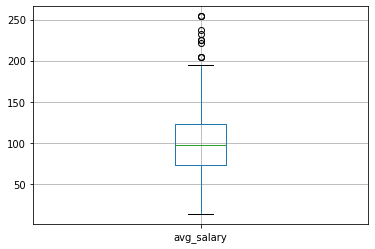

In [73]:
df.boxplot(column = 'avg_salary')

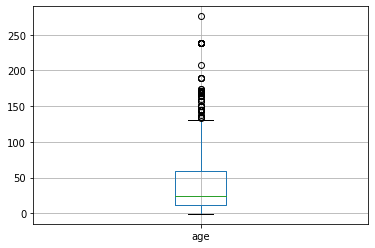

In [74]:
df.boxplot(column = 'age')

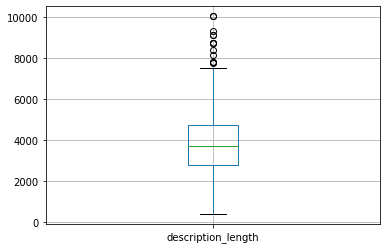

In [75]:
df.boxplot(column = 'description_length')

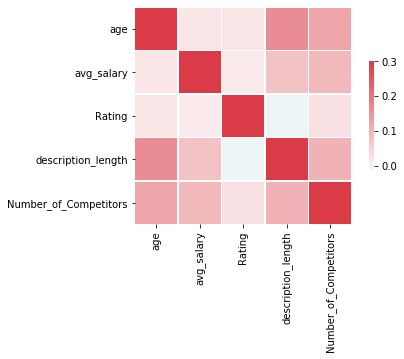

In [80]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','description_length','Number_of_Competitors']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [79]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority',
       'description_length', 'Number_of_Competitors'],
      dtype='object')

In [81]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue','company_txt','job_state', 'same_state','python_yn', 'R_yn',
       'spark', 'aws', 'excel','job_simplified', 'seniority']]

Graph for: Location Total: 200


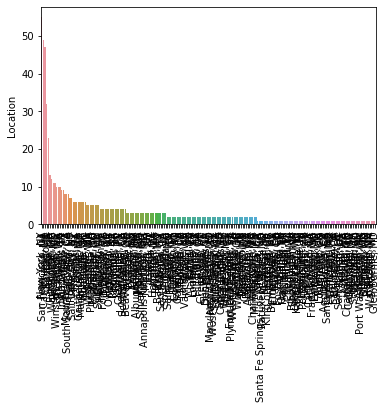

Graph for: Headquarters Total: 198


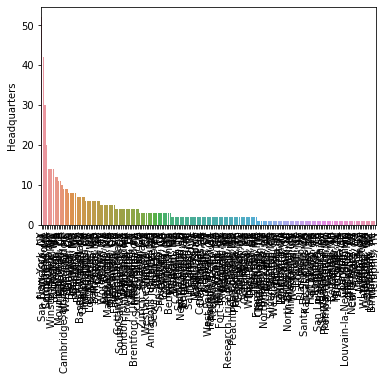

Graph for: Size Total: 9


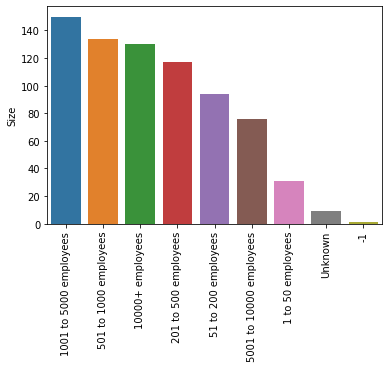

Graph for: Type of ownership Total: 11


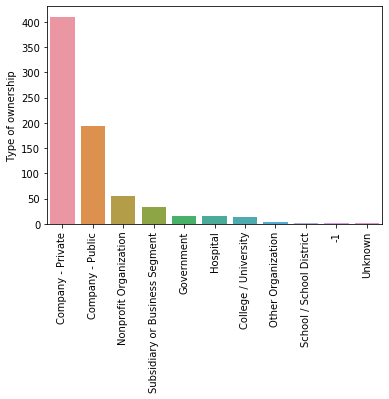

Graph for: Industry Total: 60


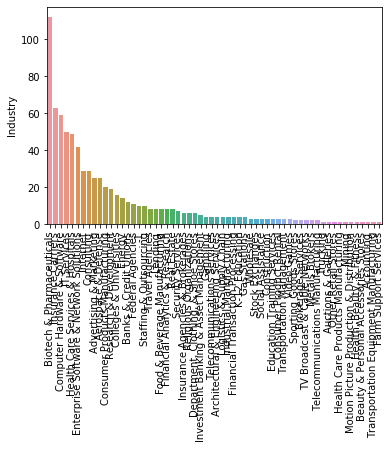

Graph for: Sector Total: 25


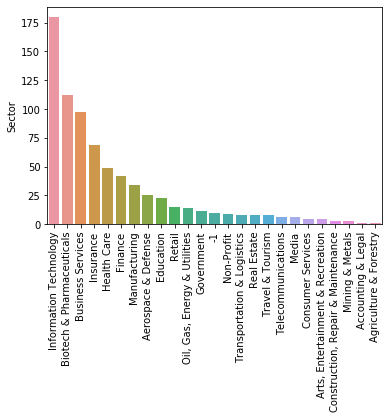

Graph for: Revenue Total: 14


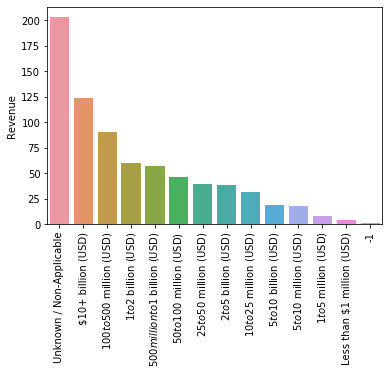

Graph for: company_txt Total: 343


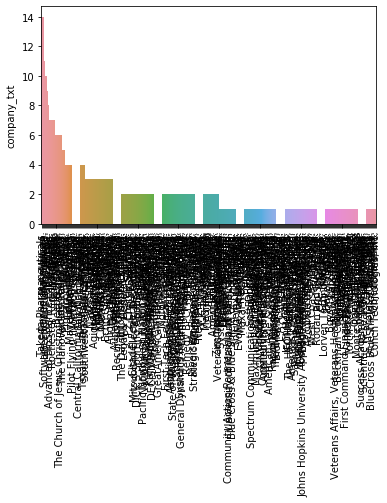

Graph for: job_state Total: 37


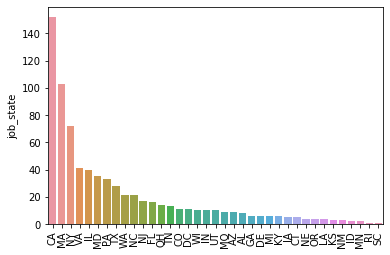

Graph for: same_state Total: 2


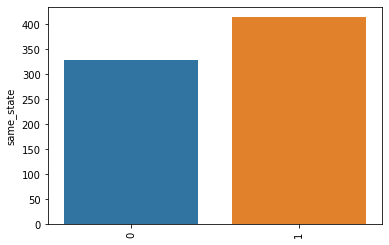

Graph for: python_yn Total: 2


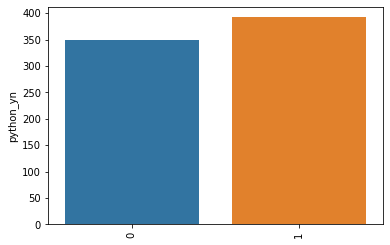

Graph for: R_yn Total: 2


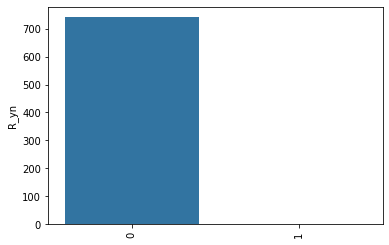

Graph for: spark Total: 2


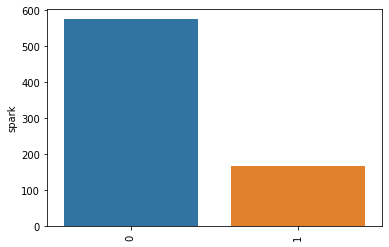

Graph for: aws Total: 2


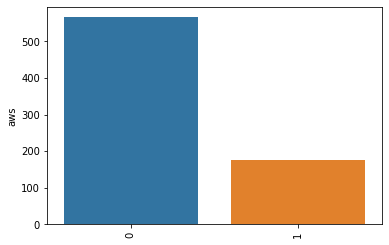

Graph for: excel Total: 2


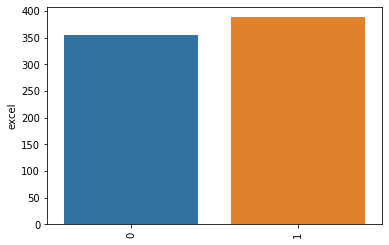

Graph for: job_simplified Total: 7


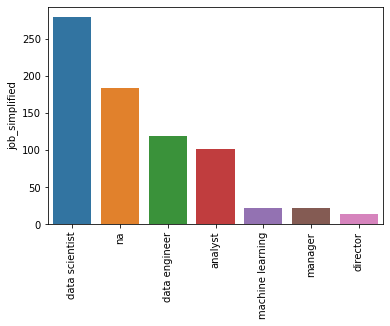

Graph for: seniority Total: 3


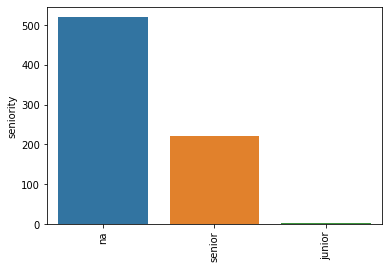

In [82]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for: %s Total: %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    mplt.show()

Graph for Top 20: Location 


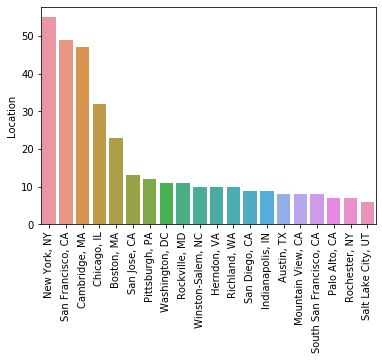

Graph for Top 20: Headquarters 


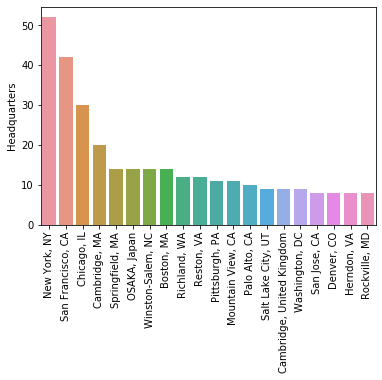

Graph for Top 20: Industry 


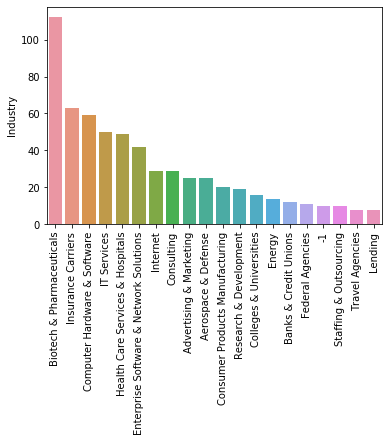

Graph for Top 20: company_txt 


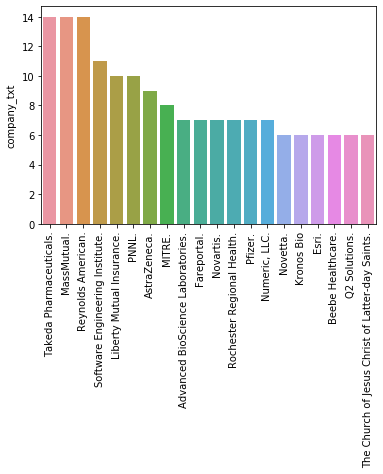

In [85]:
for i in df_cat[['Location', 'Headquarters','Industry','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for Top 20: %s " % (i))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    mplt.show()

In [86]:
pd.pivot_table(df, index = 'job_simplified', values = 'avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [87]:
pd.pivot_table(df, index = ['job_simplified', 'seniority'], values = 'avg_salary')

avg_salary
job_simplified   seniority            
analyst          junior      56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   junior     106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

In [89]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [91]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [92]:
pd.pivot_table(df, index = ['job_state', 'job_simplified'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplified              
WI        na                 54.000000
          data scientist    113.500000
          analyst            58.833333
WA        na                 97.500000
          data scientist     99.764706
          analyst            54.500000
VA        na                 79.300000
          machine learning   87.000000
          data scientist    108.416667
          data engineer      96.900000
          analyst            71.583333
UT        data engineer     100.333333
          analyst            54.750000
          data scientist    140.500000
TX        na                 41.285714
          data scientist    100.730769
          data engineer     113.062500
TN        data scientist     96.000000
          data engineer     100.950000
          analyst            13.500000
SC        na                 60.500000
RI        analyst           100.000000
PA        machine learning  120.500000
          data engineer      91.500000
          data scientist    113.333333
          analyst            62.750000
          manager           109.666667
          na                 76.062500
OR        data scientist     98.500000
          data engineer      73.000000
OH        na                 91.166667
          data scientist    105.285714
          analyst            53.875000
NY        na                 81.583333
          machine learning  125.000000
          data scientist    115.250000
          data engineer      86.375000
          analyst            65.607143
NM        data scientist     74.333333
NJ        data scientist    106.875000
          analyst            83.583333
          data engineer     112.000000
          manager           109.500000
          director          161.500000
          na                 82.500000
NE        na                 41.000000
NC        na                 90.916667
          data scientist    117.000000
          data engineer     104.250000
MO        na                 72.333333
          manager            40.500000
          data scientist    127.666667
          analyst            61.000000
MN        data engineer      95.000000
          analyst            76.000000
MI        manager            87.500000
          data scientist    106.625000
MD        na                 88.750000
          data scientist    109.115385
          data engineer     109.000000
          analyst            80.666667
MA        na                107.478261
          manager            71.900000
          director          117.833333
          data scientist    113.750000
          data engineer     107.291667
          analyst            59.125000
LA        analyst            48.000000
          data engineer      70.500000
          na                 20.000000
KY        na                103.500000
          data scientist     84.000000
KS        machine learning   87.000000
IN        na                 69.000000
          data scientist     84.500000
          data engineer     114.500000
IL        analyst            66.500000
          na                 57.166667
          machine learning  133.000000
          director          221.750000
          data scientist    117.233333
          data engineer      96.125000
ID        analyst            56.250000
IA        analyst            43.000000
          data engineer     102.833333
GA        data scientist     81.333333
          na                 80.000000
FL        data scientist     97.357143
          data engineer      91.833333
          analyst            47.500000
DE        na                 27.500000
DC        data scientist    149.000000
          data engineer      85.000000
          analyst            63.500000
CT        na                 62.500000
          data scientist     84.000000
CO        machine learning  100.500000
          data engineer      99.000000
          analyst            29.500000
          na                 31.500000
          data scientist    108.666667
CA        n

In [93]:
pd.pivot_table(df, index = ['job_state', 'job_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplified              
WI        na                         4
          data scientist             3
          analyst                    3
WA        na                         1
          data scientist            17
          analyst                    3
VA        na                         5
          machine learning           2
          data scientist            18
          data engineer             10
          analyst                    6
UT        data engineer              3
          analyst                    4
          data scientist             3
TX        na                         7
          data scientist            13
          data engineer              8
TN        data scientist             1
          data engineer             10
          analyst                    2
SC        na                         1
RI        analyst                    1
PA        machine learning           7
          data engineer              1
          data scientist             6
          analyst                    8
          manager                    3
          na                         8
OR        data scientist             3
          data engineer              1
OH        na                         3
          data scientist             7
          analyst                    4
NY        na                        12
          machine learning           2
          data scientist            40
          data engineer              4
          analyst                   14
NM        data scientist             3
NJ        data scientist             4
          analyst                    6
          data engineer              2
          manager                    2
          director                   2
          na                         1
NE        na                         4
NC        na                        12
          data scientist             3
          data engineer              6
MO        na                         3
          manager                    1
          data scientist             3
          analyst                    2
MN        data engineer              1
          analyst                    1
MI        manager                    2
          data scientist             4
MD        na                        16
          data scientist            13
          data engineer              3
          analyst                    3
MA        na                        46
          manager                    5
          director                   6
          data scientist            30
          data engineer             12
          analyst                    4
LA        analyst                    1
          data engineer              2
          na                         1
KY        na                         4
          data scientist             2
KS        machine learning           3
IN        na                         4
          data scientist             2
          data engineer              4
IL        analyst                    3
          na                         6
          machine learning           2
          director                   6
          data scientist            15
          data engineer              8
ID        analyst                    2
IA        analyst                    2
          data engineer              3
GA        data scientist             3
          na                         3
FL        data scientist             7
          data engineer              3
          analyst                    6
DE        na                         6
DC        data scientist             5
          data engineer              4
          analyst                    2
CT        na                         3
          data scientist             2
CO        machine learning           1
          data engineer              3
          analyst                    1
          na                         3
          data scientist             3
CA        n

In [94]:
pd.pivot_table(df, index = 'Industry', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


In [95]:
pd.pivot_table(df, index = 'Sector', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,111.767857
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333
